In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    


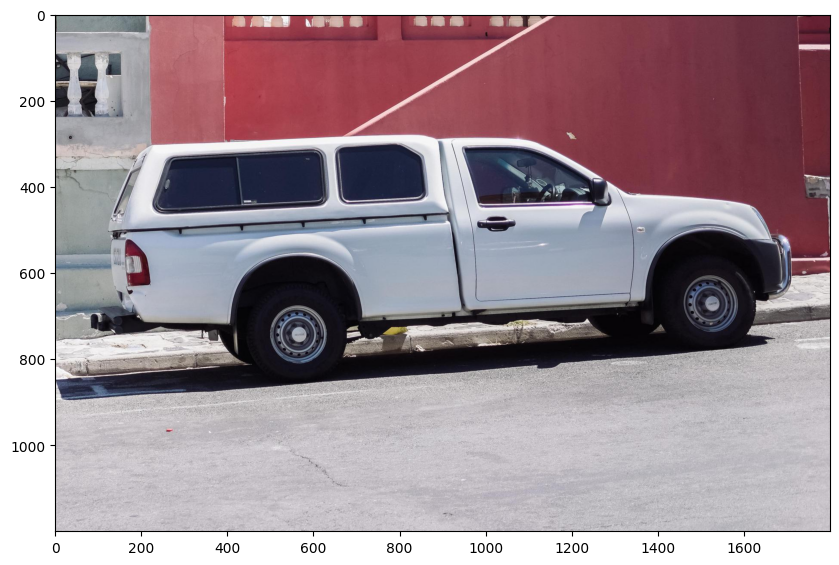

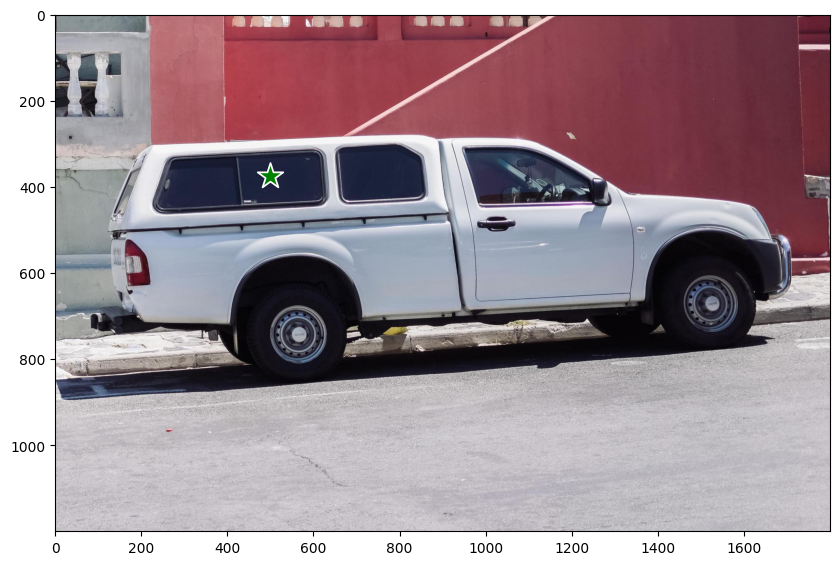

In [2]:
image = cv2.imread('notebooks/images/truck.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

input_point = np.array([[500, 375]])
input_label = np.array([1])

plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

In [3]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_b_01ec64.pth"
model_type = "vit_b"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [4]:
predictor.set_image(image)

before_patch_embed_ torch.Size([1, 3, 1024, 1024])
patch_embed_ torch.Size([1, 768, 64, 64])
patch_embed_shape :torch.Size([1, 64, 64, 768])
torch.Size([1, 64, 64, 768])
block_pos_embed_torch.Size([1, 64, 64, 768])
blk_x torch.Size([1, 64, 64, 768])
block_  torch.Size([1, 64, 64, 768])
attention  torch.Size([25, 14, 14, 768])
attention_computed  torch.Size([25, 14, 14, 768])
Adapter_T 1
Adapter_input torch.Size([25, 14, 14, 768])
x_id_shape torch.Size([25, 196, 768])
x_shape torch.Size([25, 196, 384])
adapter_pre_mlp  torch.Size([25, 196, 768])
block_mlp_  torch.Size([1, 64, 64, 768])
blk_x_after torch.Size([1, 64, 64, 768])
blk_x torch.Size([1, 64, 64, 768])
block_  torch.Size([1, 64, 64, 768])
attention  torch.Size([25, 14, 14, 768])
attention_computed  torch.Size([25, 14, 14, 768])
Adapter_T 1
Adapter_input torch.Size([25, 14, 14, 768])
x_id_shape torch.Size([25, 196, 768])
x_shape torch.Size([25, 196, 384])
adapter_pre_mlp  torch.Size([25, 196, 768])
block_mlp_  torch.Size([1, 64, 

In [5]:
image.shape

(1200, 1800, 3)

In [6]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

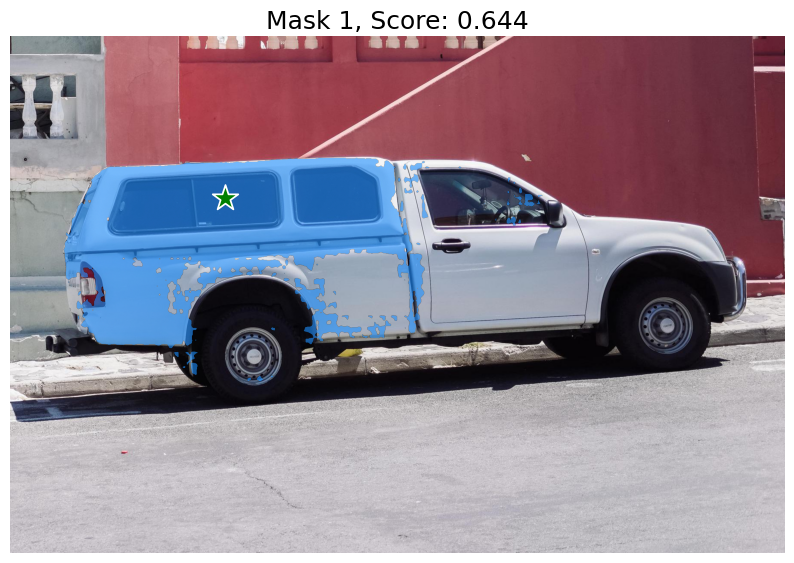

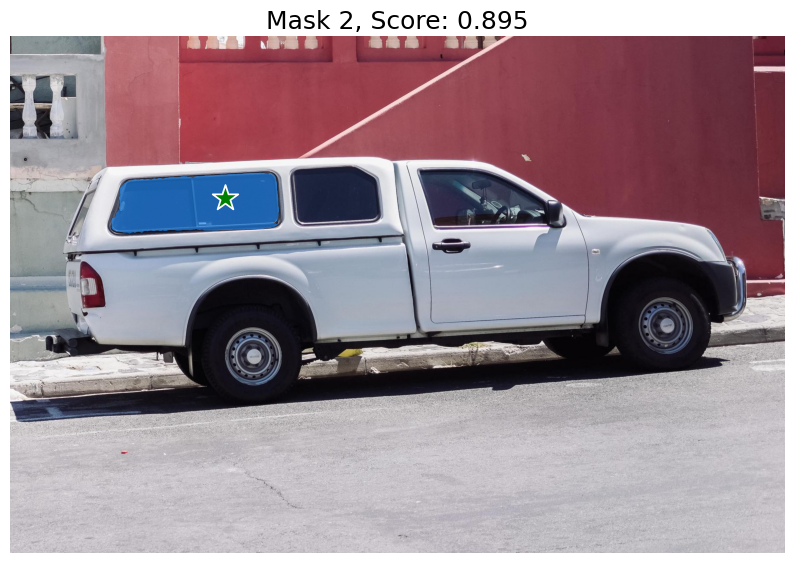

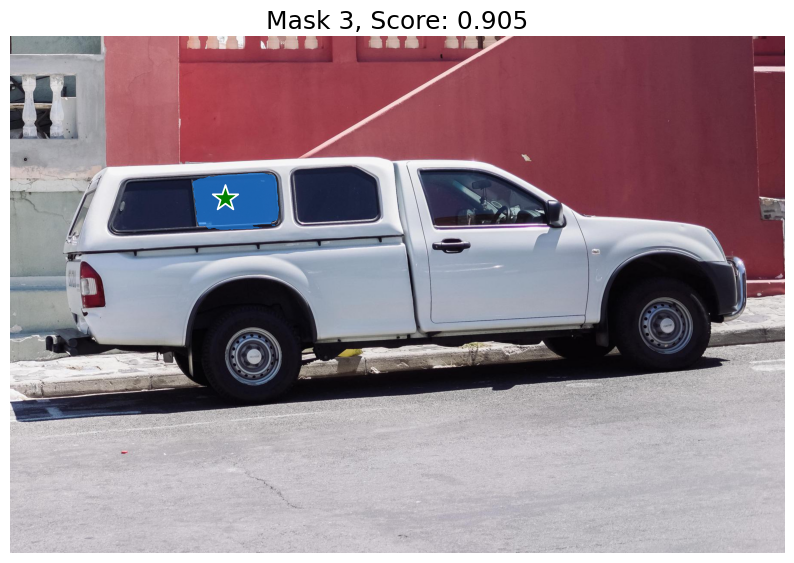

In [7]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  
  

In [5]:
image.shape

(1200, 1800, 3)

In [4]:
from segment_anything.utils.transforms import ResizeLongestSide
resize_transform = ResizeLongestSide(sam.image_encoder.img_size)

def prepare_image(image, transform, device):
    image = transform.apply_image(image)
    image = torch.as_tensor(image, device=device.device) 
    return image.permute(2, 0, 1).contiguous()

print(prepare_image(image, resize_transform, sam).shape)
batched_input = [
     {
         'image': prepare_image(image, resize_transform, sam),
         'point_coords': torch.as_tensor(resize_transform.apply_coords(input_point, image.shape[:2]),   dtype=torch.float, device=device).unsqueeze(0),
         'point_labels': torch.as_tensor([input_label], dtype=torch.int, device=device) ,
         'original_size': image.shape[:2]
     }     for i in range(2)
]

batched_output = sam(batched_input, multimask_output=True)

torch.Size([3, 683, 1024])
before_patch_embed_ torch.Size([2, 3, 1024, 1024])
patch_embed_ torch.Size([2, 768, 64, 64])
patch_embed_shape :torch.Size([2, 64, 64, 768])
torch.Size([1, 64, 64, 768])
block_pos_embed_torch.Size([2, 64, 64, 768])
blk_x torch.Size([2, 64, 64, 768])
block_  torch.Size([2, 64, 64, 768])
attention  torch.Size([50, 14, 14, 768])
attention_computed  torch.Size([50, 14, 14, 768])
Adapter_T 1
Adapter_input torch.Size([50, 14, 14, 768])
x_id_shape torch.Size([50, 196, 768])
x_shape torch.Size([50, 196, 384])
adapter_pre_mlp  torch.Size([50, 196, 768])
block_mlp_  torch.Size([2, 64, 64, 768])
blk_x_after torch.Size([2, 64, 64, 768])
blk_x torch.Size([2, 64, 64, 768])
block_  torch.Size([2, 64, 64, 768])
attention  torch.Size([50, 14, 14, 768])
attention_computed  torch.Size([50, 14, 14, 768])
Adapter_T 1
Adapter_input torch.Size([50, 14, 14, 768])
x_id_shape torch.Size([50, 196, 768])
x_shape torch.Size([50, 196, 384])
adapter_pre_mlp  torch.Size([50, 196, 768])
bloc

/tmp/ipykernel_37705/1491980208.py:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995622/work/torch/csrc/utils/tensor_new.cpp:245.)
  'point_labels': torch.as_tensor([input_label], dtype=torch.int, device=device) ,


attention_computed  torch.Size([50, 14, 14, 768])
Adapter_T 1
Adapter_input torch.Size([50, 14, 14, 768])
x_id_shape torch.Size([50, 196, 768])
x_shape torch.Size([50, 196, 384])
adapter_pre_mlp  torch.Size([50, 196, 768])
block_mlp_  torch.Size([2, 64, 64, 768])
blk_x_after torch.Size([2, 64, 64, 768])
blk_x torch.Size([2, 64, 64, 768])
block_  torch.Size([2, 64, 64, 768])
attention  torch.Size([50, 14, 14, 768])
attention_computed  torch.Size([50, 14, 14, 768])
Adapter_T 1
Adapter_input torch.Size([50, 14, 14, 768])
x_id_shape torch.Size([50, 196, 768])
x_shape torch.Size([50, 196, 384])
adapter_pre_mlp  torch.Size([50, 196, 768])
block_mlp_  torch.Size([2, 64, 64, 768])
blk_x_after torch.Size([2, 64, 64, 768])
blk_x torch.Size([2, 64, 64, 768])
block_  torch.Size([2, 64, 64, 768])
attention  torch.Size([2, 64, 64, 768])
attention_computed  torch.Size([2, 64, 64, 768])
Adapter_T 1
Adapter_input torch.Size([2, 64, 64, 768])
x_id_shape torch.Size([2, 4096, 768])
x_shape torch.Size([2, 

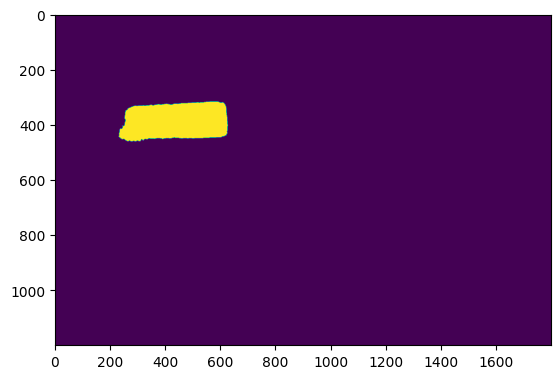

In [45]:
plt.imshow(batched_output[1]['masks'].cpu().numpy().squeeze()[1])